In [2]:
from utils import load_data, split_words_by_label, get_vocab_size, unique

In [3]:
train_texts, train_labels = load_data('data/sst_train.csv')

#divide the train dataset into 5 splits, train : validation = 4 : 1
valid_texts, valid_labels = train_texts[-int(len(train_texts)/5):], train_labels[-int(len(train_texts)/5):]
train_texts, train_labels = train_texts[:-int(len(train_texts)/5)], train_labels[:-int(len(train_texts)/5)]
test_texts, test_labels = load_data('data/sst_test.csv')

In [5]:
# Extract features from the texts
    #Using hand-crafted Naive Bayes model to solve the problem.

    #mapping (word, label) to conditional probability
word_to_prob = {}
label_set = [i for i in range(5)]
total_labeled_words, label_portion = split_words_by_label(train_texts, train_labels, label_set)
    #print(total_labeled_words)

    #Question: How many words should the vocabulary contain?
    #If only comes from train set, the prob of out-of-vocabulary is still quite high...
vocab_size, _ = get_vocab_size(train_texts)
print(vocab_size)

16256


In [6]:
#print(total_labeled_words)
sparse_words = {label: 0 for label in range(5)}
for label in total_labeled_words:
    print("total words under label {} : ".format(label), len(total_labeled_words[label]))
    cnt = 0
    for word in total_labeled_words[label]:
        if total_labeled_words[label][word] < 3:
            cnt += 1
    sparse_words[label] = cnt
    print("occurred 1 or 2 times: ", cnt, ", which account for {}".format(cnt / len(total_labeled_words[label])))
print(sparse_words)


total words under label 0 :  3733
occurred 1 or 2 times:  3090 , which account for 0.8277524778998124
total words under label 1 :  6515
occurred 1 or 2 times:  5206 , which account for 0.7990790483499616
total words under label 2 :  5965
occurred 1 or 2 times:  4898 , which account for 0.8211232187761944
total words under label 3 :  8337
occurred 1 or 2 times:  6346 , which account for 0.7611850785654312
total words under label 4 :  5328
occurred 1 or 2 times:  4203 , which account for 0.7888513513513513
{0: 3090, 1: 5206, 2: 4898, 3: 6346, 4: 4203}


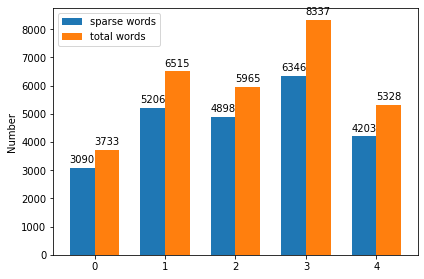

In [7]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['0', '1', '2', '3', '4']
men_means = sparse_words.values()
women_means = [len(total_labeled_words[label]) for label in range(5)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='sparse words')
rects2 = ax.bar(x + width/2, women_means, width, label='total words')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number')
#ax.set_title('Numbers of sparse words in ')
ax.set_xticks(x)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

No handles with labels found to put in legend.


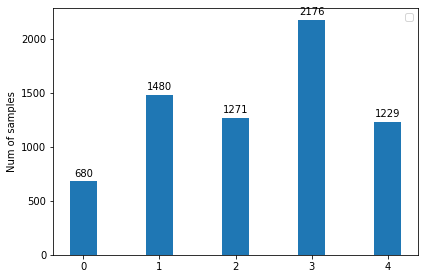

In [8]:
labels = ['0', '1', '2', '3', '4']
men_means = [label_portion[i] for i in sorted(label_portion)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, men_means, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Num of samples')
#ax.set_title('Numbers of sparse words ')
ax.set_xticks(x)
ax.legend()

ax.bar_label(rects1, padding=3)

fig.tight_layout()

plt.show()

In [10]:
for word in total_labeled_words[3]:
    if total_labeled_words[3][word] > 300:
        print(word, total_labeled_words[3][word])
        

. 2068
, 1247
's 599
to 629
and 1033
is 573
a 901
the 1113
that 470
of 930
but 313
with 322
it 440
in 445
film 331
